In [347]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
%matplotlib inline

In [348]:
f = h5py.File("./logging/logs5.txt", 'r', libver='latest', swmr=True)

In [349]:
move_q =  f['statistics']["ep_reward"][:]

In [350]:
num_eps = 2100
buckets = 20

In [351]:
print(sum( (move_q[: num_eps] > 0).astype(int) ) )

0


In [352]:
print(sum(move_q) )


-6132924.35349226


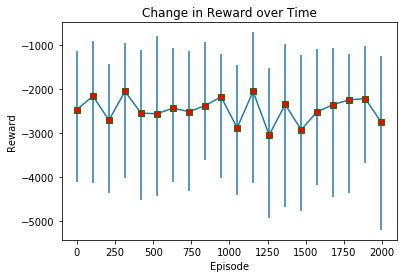

In [353]:
yerr1 = [np.percentile(move_q[num_eps*i//buckets:num_eps*(i+1)//buckets], 75) for i in range(buckets)]
yerr2 = [np.percentile(move_q[num_eps*i//buckets:num_eps*(i+1)//buckets], 25) for i in range(buckets)]
yerr = np.zeros((2, len(yerr1)))
yerr[1] = np.array(yerr1) - np.array([np.median(move_q[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)])
yerr[0] = np.array([np.median(move_q[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)]) - np.array(yerr2)

plt.errorbar(  (num_eps/buckets)*np.array(range(buckets) ) , [np.median(move_q[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)], yerr,
            marker='s', mfc='red',
         mec='green')

plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Change in Reward over Time")
plt.savefig('reward_5.png')

In [354]:
avgq =  f['statistics']["ep_q"][:]

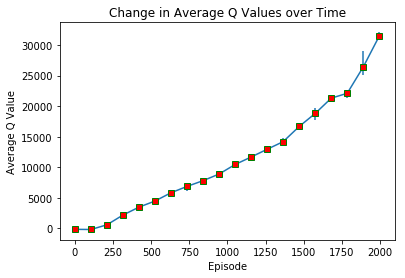

In [355]:
yerr1 = [np.percentile(avgq[num_eps*i//buckets:num_eps*(i+1)//buckets], 75) for i in range(buckets)]
yerr2 = [np.percentile(avgq[num_eps*i//buckets:num_eps*(i+1)//buckets], 25) for i in range(buckets)]
yerr = np.zeros((2, len(yerr1)))
yerr[1] = np.array(yerr1) - np.array([np.median(avgq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)])
yerr[0] = np.array([np.median(avgq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)]) - np.array(yerr2)

plt.errorbar(  (num_eps/buckets)*np.array(range(buckets) ) , [np.median(avgq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)], yerr,
            marker='s', mfc='red',
         mec='green')

plt.xlabel("Episode")
plt.ylabel("Average Q Value")
plt.title("Change in Average Q Values over Time")
plt.savefig('avgq_5.png')

In [356]:
badq =  f['statistics']["ep_badq"][:]
goodq =  f['statistics']["ep_goodq"][:]

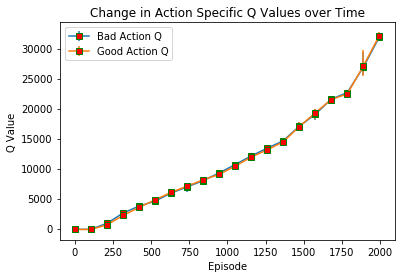

In [357]:
yerr1 = [np.percentile(badq[num_eps*i//buckets:num_eps*(i+1)//buckets], 75) for i in range(buckets)]
yerr2 = [np.percentile(badq[num_eps*i//buckets:num_eps*(i+1)//buckets], 25) for i in range(buckets)]
yerr = np.zeros((2, len(yerr1)))
yerr[1] = np.array(yerr1) - np.array([np.median(badq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)])
yerr[0] = np.array([np.median(badq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)]) - np.array(yerr2)

plt.errorbar( (num_eps/buckets)*np.array(range(buckets) ), [np.median(badq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)], yerr,
            marker='s', mfc='red',
         mec='green', label = 'Bad Action Q')

yerr1 = [np.percentile(goodq[num_eps*i//buckets:num_eps*(i+1)//buckets], 75) for i in range(buckets)]
yerr2 = [np.percentile(goodq[num_eps*i//buckets:num_eps*(i+1)//buckets], 25) for i in range(buckets)]
yerr = np.zeros((2, len(yerr1)))
yerr[1] = np.array(yerr1) - np.array([np.median(goodq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)])
yerr[0] = np.array([np.median(goodq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)]) - np.array(yerr2)

plt.errorbar(  (num_eps/buckets)*np.array(range(buckets) ), [np.median(goodq[num_eps*i//buckets:num_eps*(i+1)//buckets]) for i in range(buckets)], yerr,
            marker='s', mfc='red',
         mec='green', label = 'Good Action Q')

plt.legend()
plt.xlabel("Episode")
plt.ylabel("Q Value")
plt.title("Change in Action Specific Q Values over Time")
plt.savefig('goodbadq_5.png')